In [1]:
import numpy as np
import qutip as qp

import matplotlib.pyplot as plt
%matplotlib inline

# even-odd solution

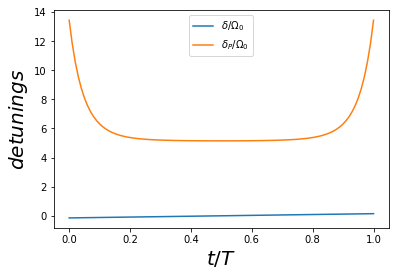

In [7]:
#Control
Omega_0=40.
H_d = qp.Qobj([[0,0,0,0],[0,0,0,0],[0,0,1,0],[0,0,0,0]])
H_D = qp.Qobj([[0,0,0,0],[0,1,0,0],[0,0,0,0],[0,0,0,0]])

#system
T=1.
time=np.linspace(0.,T,101)
psi0 = qp.fock_dm(4,0)
H_p = Omega_0*qp.Qobj([[0,0.5,0,0],[0.5,0,0,0],[0,0,0,0],[0,0,0,0]])
H_s = Omega_0*qp.Qobj([[0,0,0,0],[0,0,0.5,0],[0,0.5,0,0],[0,0,0,0]])

r, C1, C2= 21.51569276, 5.113075417, -0.038411337000000004
m=0.2917104465

def fdelta(t, *args):
    global m, Omega_0
    return m*(t/T-0.5)*Omega_0
        
def fDelta(t, *args):
    global A, r, C1, C2, Omega_0
    return C1*Omega_0-C2*np.exp(r*(t/T-0.5)**2)*Omega_0

plt.plot(time, fdelta(time)/Omega_0, label=r"$\delta/\Omega_0$")
plt.plot(time, fDelta(time)/Omega_0, label=r"$\delta_P/\Omega_0$")
plt.ylabel(r"$detunings$", fontsize=20)
plt.xlabel(r"$t/T$", fontsize=20)
plt.legend()

target population (result):  0.999443705400412
maximum |e> population:  0.014282564079930029
average |e> population:  0.006449772467041692


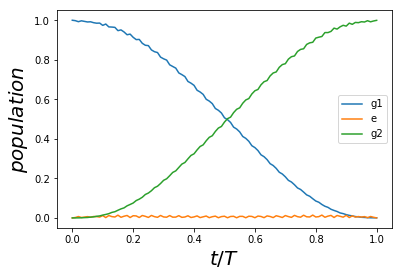

In [8]:
result=qp.mesolve([[H_d, fdelta],[H_D, fDelta],H_p,H_s], psi0, tlist=time)

p_g1=np.zeros([101])
p_e=np.zeros([101])
p_g2=np.zeros([101])

for i in range(101):
    p_g1[i]=result.states[i][0,0].real
    p_e[i]=result.states[i][1,1].real
    p_g2[i]=result.states[i][2,2].real
    
plt.plot(time/T, p_g1, label="g1")
plt.plot(time/T, p_e, label="e")
plt.plot(time/T, p_g2, label="g2")
plt.ylabel(r"$population$", fontsize=20)
plt.xlabel(r"$t/T$", fontsize=20)
plt.legend()
print("target population (result): ",result.states[-1][2,2].real)
print("maximum |e> population: ", p_e.max())
print("average |e> population: ",p_e.mean())

In [9]:
om=np.zeros(200)
target=np.zeros(200)
trash=np.zeros(200)

for k in range(200):
    Omega_0=k
    om[k]=Omega_0
    H_p = Omega_0*qp.Qobj([[0,0.5,0,0],[0.5,0,0,0],[0,0,0,0],[0,0,0,0]])
    H_s = Omega_0*qp.Qobj([[0,0,0,0],[0,0,0.5,0],[0,0.5,0,0],[0,0,0,0]])
    result=qp.mesolve([[H_d, fdelta],[H_D, fDelta],H_p,H_s], psi0, tlist=time)
    p_g1=np.zeros([101])
    p_e=np.zeros([101])
    p_g2=np.zeros([101])

    for i in range(101):
        p_g1[i]=result.states[i][0,0].real
        p_e[i]=result.states[i][1,1].real
        p_g2[i]=result.states[i][2,2].real
        
    target[k]=p_g2[-1]
    trash[k]=p_e.max()

Text(0.5,0,'$\\Omega_0T$')

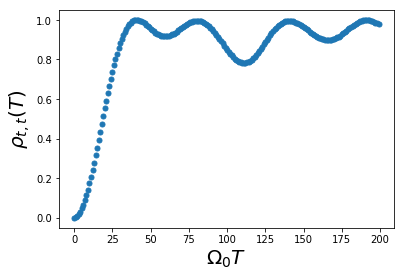

In [10]:
plt.plot(om, target, 'o', markersize=5)
plt.ylabel(r"$\rho_{t,t}(T)$", fontsize=20)
plt.xlabel(r"$\Omega_0T$", fontsize=20)

Text(0.5,0,'$\\Omega_0T$')

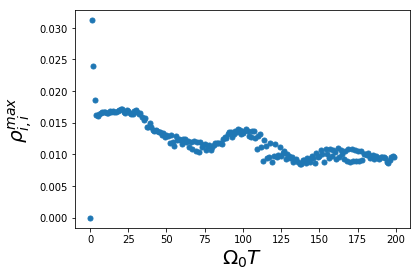

In [11]:
plt.plot(om, trash, 'o', markersize=5)
plt.ylabel(r"$\rho_{i,i}^{max}$", fontsize=20)
plt.xlabel(r"$\Omega_0T$", fontsize=20)

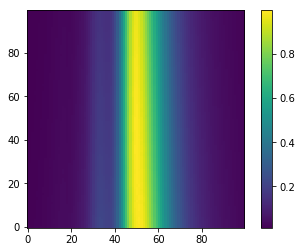

In [80]:
Omega_0=40.

def eta(d,dp):
    global Omega_0, T, time, r, C1, C2, m, H_d, H_D, H_p, H_s, psi0
    
    pert=Omega_0*qp.Qobj([[0,0,0,0],[0,dp,0,0],[0,0,d,0],[0,0,0,0]])
    result=qp.mesolve([[H_d, fdelta],[H_D, fDelta],H_p,H_s, pert], psi0, tlist=time)
    
    p_g2=np.zeros(101)
    for i in range(101):
        p_g2[i]=result.states[i][2,2].real
    
    return(p_g2.max())

vfunc = np.vectorize(eta, otypes=[float])
xrange=np.linspace(-0.6,0.6,100)
yrange=np.linspace(-2.5,2.5,100)
X0,X1=np.meshgrid(xrange,xrange)
plt.imshow(vfunc(X0,X1),interpolation='nearest',origin='lower')
plt.colorbar()
plt.show()

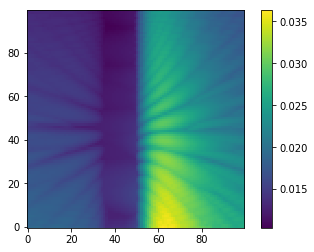

In [112]:
Omega_0=40.

def eta(d,dp):
    global Omega_0, T, time, r, C1, C2, m, H_d, H_D, H_p, H_s, psi0
    
    pert=Omega_0*qp.Qobj([[0,0,0,0],[0,dp,0,0],[0,0,d,0],[0,0,0,0]])
    result=qp.mesolve([[H_d, fdelta],[H_D, fDelta],H_p,H_s, pert], psi0, tlist=time)
    
    p_e=np.zeros(101)
    for i in range(101):
        p_e[i]=result.states[i][1,1].real
    
    return(p_e.max())

vfunc = np.vectorize(eta, otypes=[float])
xrange=np.linspace(-0.6,0.6,100)
yrange=np.linspace(-2.5,2.5,100)
X0,X1=np.meshgrid(xrange,xrange)
plt.imshow(vfunc(X0,X1),interpolation='nearest',origin='lower')
plt.colorbar()
plt.show()

# odd-even solution

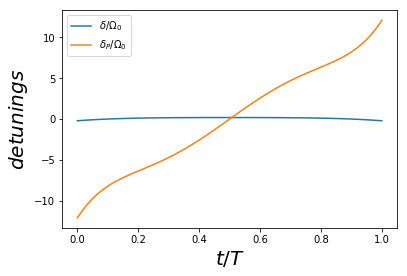

In [12]:
#Control
Omega_0=40.
H_d = qp.Qobj([[0,0,0,0],[0,0,0,0],[0,0,1,0],[0,0,0,0]])
H_D = qp.Qobj([[0,0,0,0],[0,1,0,0],[0,0,0,0],[0,0,0,0]])

#system
T=1.
time=np.linspace(0.,T,101)
psi0 = qp.fock_dm(4,0)
H_p = Omega_0*qp.Qobj([[0,0.5,0,0],[0.5,0,0,0],[0,0,0,0],[0,0,0,0]])
H_s = Omega_0*qp.Qobj([[0,0,0,0],[0,0,0.5,0],[0,0.5,0,0],[0,0,0,0]])

ad, bd, cd= 2.65031380e+01, -8.72507260e+01,  3.12085203e+02
a, b, c= 1.87600931e-01,-3.67185983e-01, -4.84742032e+00

def fDelta(t, *args):
    global ad, bd, cd
    return Omega_0*(ad*(t/T-0.5)+bd*((t/T-0.5)**3)+cd*((t/T-0.5)**5))

def fdelta(t, *args):
    global a, b, c
    return Omega_0*(a+b*((t/T-0.5)**2)+c*((t/T-0.5)**4))

plt.plot(time, fdelta(time)/Omega_0, label=r"$\delta/\Omega_0$")
plt.plot(time, fDelta(time)/Omega_0, label=r"$\delta_P/\Omega_0$")
plt.ylabel(r"$detunings$", fontsize=20)
plt.xlabel(r"$t/T$", fontsize=20)
plt.legend()

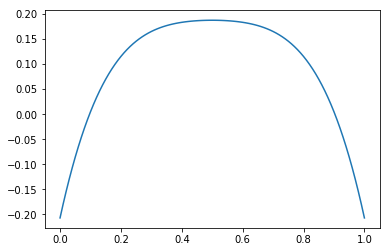

In [13]:
plt.plot(time, fdelta(time)/Omega_0, label=r"$\delta/\Omega_0$")

target population (result):  0.9969053170711807
maximum |e> population:  0.015546854873079642
average |e> population:  0.006475844337226893


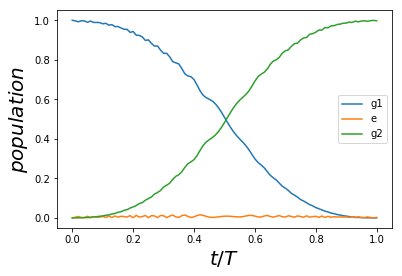

In [14]:
result=qp.mesolve([[H_d, fdelta],[H_D, fDelta],H_p,H_s], psi0, tlist=time)

p_g1=np.zeros([101])
p_e=np.zeros([101])
p_g2=np.zeros([101])

for i in range(101):
    p_g1[i]=result.states[i][0,0].real
    p_e[i]=result.states[i][1,1].real
    p_g2[i]=result.states[i][2,2].real
    
plt.plot(time/T, p_g1, label="g1")
plt.plot(time/T, p_e, label="e")
plt.plot(time/T, p_g2, label="g2")
plt.ylabel(r"$population$", fontsize=20)
plt.xlabel(r"$t/T$", fontsize=20)
plt.legend()
print("target population (result): ",result.states[-1][2,2].real)
print("maximum |e> population: ", p_e.max())
print("average |e> population: ",p_e.mean())

In [15]:
om=np.zeros(200)
target=np.zeros(200)
trash=np.zeros(200)

for k in range(200):
    Omega_0=k
    om[k]=Omega_0
    H_p = Omega_0*qp.Qobj([[0,0.5,0,0],[0.5,0,0,0],[0,0,0,0],[0,0,0,0]])
    H_s = Omega_0*qp.Qobj([[0,0,0,0],[0,0,0.5,0],[0,0.5,0,0],[0,0,0,0]])
    result=qp.mesolve([[H_d, fdelta],[H_D, fDelta],H_p,H_s], psi0, tlist=time)
    p_g1=np.zeros([101])
    p_e=np.zeros([101])
    p_g2=np.zeros([101])

    for i in range(101):
        p_g1[i]=result.states[i][0,0].real
        p_e[i]=result.states[i][1,1].real
        p_g2[i]=result.states[i][2,2].real
        
    target[k]=p_g2[-1]
    trash[k]=p_e.max()

Text(0.5,0,'$\\Omega_0T$')

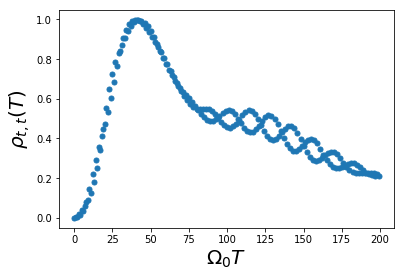

In [16]:
plt.plot(om, target, 'o', markersize=5)
plt.ylabel(r"$\rho_{t,t}(T)$", fontsize=20)
plt.xlabel(r"$\Omega_0T$", fontsize=20)

Text(0.5,0,'$\\Omega_0T$')

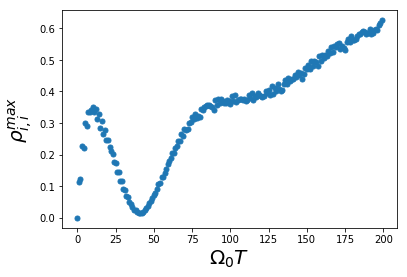

In [17]:
plt.plot(om, trash, 'o', markersize=5)
plt.ylabel(r"$\rho_{i,i}^{max}$", fontsize=20)
plt.xlabel(r"$\Omega_0T$", fontsize=20)

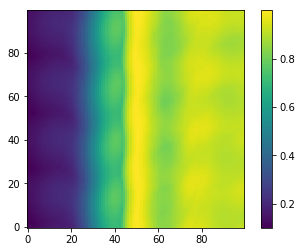

In [83]:
Omega_0=40.

def eta(d,dp):
    global Omega_0, T, time, r, C1, C2, m, H_d, H_D, H_p, H_s, psi0
    
    pert=Omega_0*qp.Qobj([[0,0,0,0],[0,dp,0,0],[0,0,d,0],[0,0,0,0]])
    result=qp.mesolve([[H_d, fdelta],[H_D, fDelta],H_p,H_s, pert], psi0, tlist=time)
    
    p_g2=np.zeros(101)
    for i in range(101):
        p_g2[i]=result.states[i][2,2].real
    
    return(p_g2.max())

vfunc = np.vectorize(eta, otypes=[float])
xrange=np.linspace(-0.6,0.6,100)
yrange=np.linspace(-2.5,2.5,100)
X0,X1=np.meshgrid(xrange,xrange)
plt.imshow(vfunc(X0,X1),interpolation='nearest',origin='lower')
plt.colorbar()
plt.show()

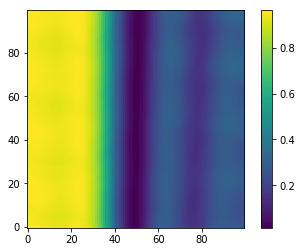

In [115]:
Omega_0=40.

def eta(d,dp):
    global Omega_0, T, time, r, C1, C2, m, H_d, H_D, H_p, H_s, psi0
    
    pert=Omega_0*qp.Qobj([[0,0,0,0],[0,dp,0,0],[0,0,d,0],[0,0,0,0]])
    result=qp.mesolve([[H_d, fdelta],[H_D, fDelta],H_p,H_s, pert], psi0, tlist=time)
    
    p_e=np.zeros(101)
    for i in range(101):
        p_e[i]=result.states[i][1,1].real
    
    return(p_e.max())

vfunc = np.vectorize(eta, otypes=[float])
xrange=np.linspace(-0.6,0.6,100)
yrange=np.linspace(-2.5,2.5,100)
X0,X1=np.meshgrid(xrange,xrange)
plt.imshow(vfunc(X0,X1),interpolation='nearest',origin='lower')
plt.colorbar()
plt.show()

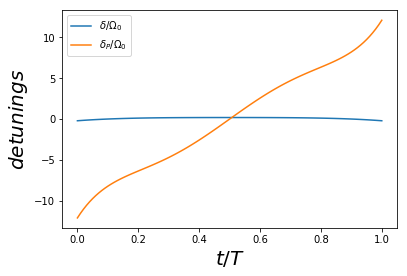

In [30]:
#Control
Omega_0=40.
H_d = qp.Qobj([[0,0,0,0],[0,0,0,0],[0,0,1,0],[0,0,0,0]])
H_D = qp.Qobj([[0,0,0,0],[0,1,0,0],[0,0,0,0],[0,0,0,0]])

#system
T=1.
time=np.linspace(0.,T,101)
psi0 = qp.fock_dm(4,0)
H_p = Omega_0*qp.Qobj([[0,0.5,0,0],[0.5,0,0,0],[0,0,0,0],[0,0,0,0]])
H_s = Omega_0*qp.Qobj([[0,0,0,0],[0,0,0.5,0],[0,0.5,0,0],[0,0,0,0]])

ad, bd, cd= 26.50, -87.25,  312.08
a, b, c= 0.19,-0.37, -4.85

def fDelta(t, *args):
    global ad, bd, cd
    return Omega_0*(ad*(t/T-0.5)+bd*((t/T-0.5)**3)+cd*((t/T-0.5)**5))

def fdelta(t, *args):
    global a, b, c
    return Omega_0*(a+b*((t/T-0.5)**2)+c*((t/T-0.5)**4))

plt.plot(time, fdelta(time)/Omega_0, label=r"$\delta/\Omega_0$")
plt.plot(time, fDelta(time)/Omega_0, label=r"$\delta_P/\Omega_0$")
plt.ylabel(r"$detunings$", fontsize=20)
plt.xlabel(r"$t/T$", fontsize=20)
plt.legend()

target population (result):  0.9967125583772898
maximum |e> population:  0.015367235675095795
average |e> population:  0.006455868880365235


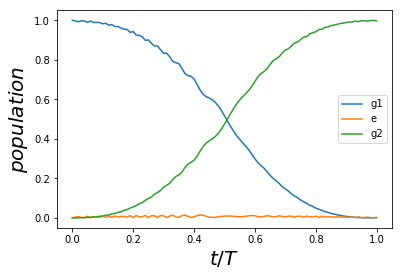

In [31]:
result=qp.mesolve([[H_d, fdelta],[H_D, fDelta],H_p,H_s], psi0, tlist=time)

p_g1=np.zeros([101])
p_e=np.zeros([101])
p_g2=np.zeros([101])

for i in range(101):
    p_g1[i]=result.states[i][0,0].real
    p_e[i]=result.states[i][1,1].real
    p_g2[i]=result.states[i][2,2].real
    
plt.plot(time/T, p_g1, label="g1")
plt.plot(time/T, p_e, label="e")
plt.plot(time/T, p_g2, label="g2")
plt.ylabel(r"$population$", fontsize=20)
plt.xlabel(r"$t/T$", fontsize=20)
plt.legend()
print("target population (result): ",result.states[-1][2,2].real)
print("maximum |e> population: ", p_e.max())
print("average |e> population: ",p_e.mean())